In [1]:
import dask.dataframe as dd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Correlation Matrix

Prototipação de um algoritmo para recomendação baseado em similaridade de item/usuário, em que um dado um novo usuário, calcula-se a correlação entre ele e todos os outros usuários na matriz df3 abaixo. Para as maiores correlações, sugerir os filmes que um usuário correlacionado assistiu que o novo usuário ainda não assistiu.

In [2]:
df = dd.read_csv('./userId_genres_media_nota.csv', sep=';')

In [8]:
df.head()

,userId,genres,count(*),sum(a.rating),sum(a.rating) / count(*)
0,1,Action|Adventure,3,11.0,3.666667
1,1,Action|Adventure|Animation|Children|Comedy,1,4.0,4.000000
2,1,Action|Adventure|Animation|Drama|Fantasy,1,3.5,3.500000
3,1,Action|Adventure|Animation|Fantasy|Sci-Fi,1,3.5,3.500000
4,1,Action|Adventure|Children|Fantasy,2,6.5,3.250000


In [13]:
df = df[df['userId'] <= 10]

In [49]:
df2 = df.groupby(['userId', 'genres']).agg({'sum(a.rating) / count(*)':'mean'}).compute()

In [54]:
df3 = df2.unstack('userId', fill_value=0)

In [63]:
df3

sum(a.rating) / count(*)            \
userId                                                           1         2    
genres                                                                          
Action|Adventure                                           3.666667  0.000000   
Action|Adventure|Animation|Children|Comedy                 4.000000  0.000000   
Action|Adventure|Animation|Drama|Fantasy                   3.500000  0.000000   
Action|Adventure|Animation|Fantasy|Sci-Fi                  3.500000  0.000000   
Action|Adventure|Animation|Horror|Sci-Fi                   0.000000  0.000000   
Action|Adventure|Children|Fantasy                          3.250000  0.000000   
Action|Adventure|Comedy                                    3.500000  0.000000   
Action|Adventure|Comedy|Crime                              3.500000  0.000000   
Action|Adventure|Comedy|Fantasy                            4.000000  0.000000   
Action|Adventure|Comedy|Fantasy|Horror                     4.000000  0.000000   
Action|Adventure|Comedy|Fantasy|Romance                    0.000000  0.000000   
Action|Adventure|Comedy|Romance                            0.000000  0.000000   
Action|Adventure|Comedy|Romance|Thriller                   0.000000  0.000000   
Action|Adventure|Comedy|Sci-Fi                             0.000000  0.000000   
Action|Adventure|Comedy|Thriller                           0.000000  0.000000   
Action|Adventure|Drama                                     0.000000  0.000000   
Action|Adventure|Drama|Fantasy                             5.000000  0.000000   
Action|Adventure|Drama|Sci-Fi                              0.000000  0.000000   
Action|Adventure|Drama|Thriller                            0.000000  0.000000   
Action|Adventure|Drama|War                                 3.500000  0.000000   
Action|Adventure|Fantasy                                   3.611111  0.000000   
Action|Adventure|Fantasy|Horror                            4.000000  0.000000   
Action|Adventure|Fantasy|Romance                           4.000000  0.000000   
Action|Adventure|Fantasy|Sci-Fi                            3.000000  0.000000   
Action|Adventure|Horror|Sci-Fi                             4.000000  0.000000   
Action|Adventure|Mystery|Romance|Thriller                  0.000000  4.000000   
Action|Adventure|Mystery|Sci-Fi                            0.000000  0.000000   
Action|Adventure|Mystery|Thriller                          0.000000  0.000000   
Action|Adventure|Romance                                   0.000000  0.000000   
Action|Adventure|Romance|Thriller                          0.000000  0.000000   
...                                                             ...       ...   
Drama|Romance|War                                          0.000000  0.000000   
Drama|Romance|War|Western                                  0.000000  5.000000   
Drama|Sci-Fi                                               3.500000  0.000000   
Drama|Sci-Fi|Thriller                                      0.000000  0.000000   
Drama|Thriller                                             0.000000  4.500000   
Drama|Thriller|War                                         0.000000  0.000000   
Drama|War                                                  3.666667  0.000000   
Drama|Western                                              4.000000  0.000000   
Fantasy|Horror                                             4.000000  0.000000   
Fantasy|Horror|Mystery|Romance                             4.000000  0.000000   
Fantasy|Horror|Sci-Fi|Thriller                             4.000000  0.000000   
Fantasy|Horror|Thriller                                    3.500000  0.000000   
Fantasy|Sci-Fi                                             0.000000  0.000000   
Horror                                                     3.666667  2.666667   
Horror|Mystery                                             3.500000  0.000000   
Horror|Mystery|Sci-Fi                                      0.000000  4.000

In [56]:
df4 = df2.unstack(fill_value=0)

In [64]:
df3.corr()

sum(a.rating) / count(*)                      \
userId                                                1         2         3    
                         userId                                                
sum(a.rating) / count(*) 1                      1.000000  0.120561  0.113914   
                         2                      0.120561  1.000000  0.201685   
                         3                      0.113914  0.201685  1.000000   
                         4                     -0.018982  0.172652  0.040273   
                         5                     -0.054616  0.103254  0.102758   
                         6                     -0.013818  0.198885  0.187373   
                         7                     -0.225857  0.085403  0.035352   
                         8                     -0.029944  0.163333  0.079845   
                         9                      0.181312  0.108825  0.100048   
                         10                     0.016240  0.141971  0.210242   

                                                                         \
userId                                 4         5         6         7    
                         userId                                           
sum(a.rating) / count(*) 1      -0.018982 -0.054616 -0.013818 -0.225857   
                         2       0.172652  0.103254  0.198885  0.085403   
                         3       0.040273  0.102758  0.187373  0.035352   
                         4       1.000000  0.411151  0.125482  0.050849   
                         5       0.411151  1.000000  0.300333  0.089339   
                         6       0.125482  0.300333  1.000000  0.100031   
                         7       0.050849  0.089339  0.100031  1.000000   
                         8       0.312204  0.413342  0.291976  0.118265   
                         9       0.217829  0.165406  0.151280  0.041531   
                         10      0.089967  0.158946  0.340121  0.094284   

                                                               
userId                                 8         9         10  
                         userId                                
sum(a.rating) / count(*) 1      -0.029944  0.181312  0.016240  
                         2       0.163333  0.108825  0.141971  
                         3       0.079845  0.100048  0.210242  
                         4       0.312204  0.217829  0.089967  
                         5       0.413342  0.165406  0.158946  
                         6       0.291976  0.151280  0.340121  
                         7       0.118265  0.041531  0.094284  
                         8       1.000000  0.129970  0.185604  
                         9       0.129970  1.000000  0.130609  
                         10      0.185604  0.130609  1.000000

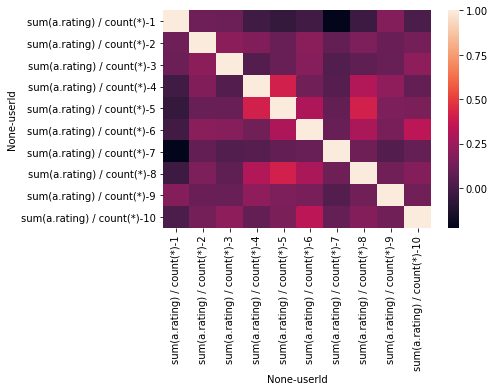

In [62]:
sns.heatmap(df3.corr());

# ==============================================================

In [4]:
# Lendo a base movies.xls
df = pd.read_excel('./movies.xls')

In [10]:
df.head()

,movieId,imdbId,tmdbId,title,genres1,genres1.1,genres2,genres2.1,genres3,genres3.1,genres4,genres4.1,genres5,genres5.1
0,1,114709,862,Toy Story (1995),1.0,Adventure,9.0,Animation,6.0,Children,2.0,Comedy,12.0,Fantasy
1,2,113497,8844,Jumanji (1995),1.0,Adventure,6.0,Children,12.0,Fantasy,NaN,NaN,NaN,NaN
2,3,113228,15602,Grumpier Old Men (1995),2.0,Comedy,15.0,Romance,NaN,NaN,NaN,NaN,NaN,NaN
3,4,114885,31357,Waiting to Exhale (1995),2.0,Comedy,4.0,Drama,15.0,Romance,NaN,NaN,NaN,NaN
4,5,113041,11862,Father of the Bride Part II (1995),2.0,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


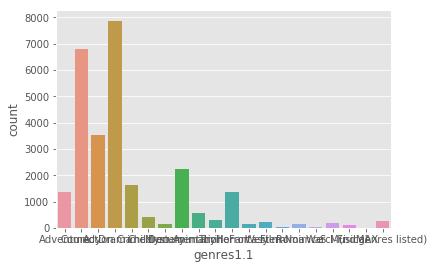

In [24]:
sns.countplot(x='genres1.1', data=df);

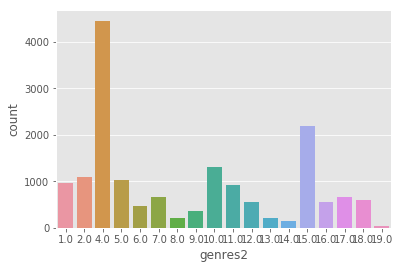

In [13]:
sns.countplot(x='genres2', data=df);

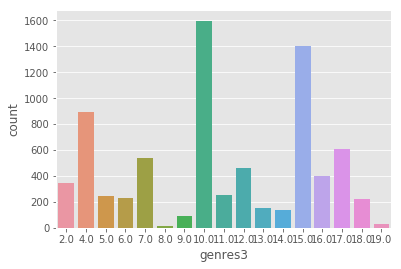

In [14]:
sns.countplot(x='genres3', data=df);

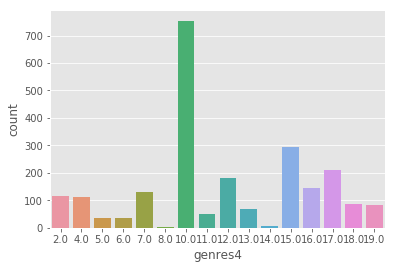

In [15]:
sns.countplot(x='genres4', data=df);

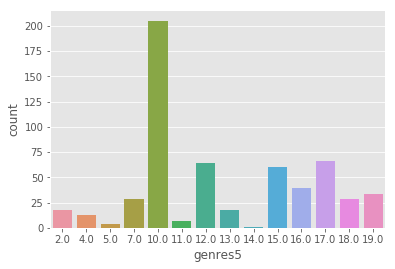

In [16]:
sns.countplot(x='genres5', data=df);

In [25]:
# lendo o dataset ratings.csv
df = dd.read_csv('./ratings.csv')

In [30]:
df2 = df.groupby('rating').sum().compute()

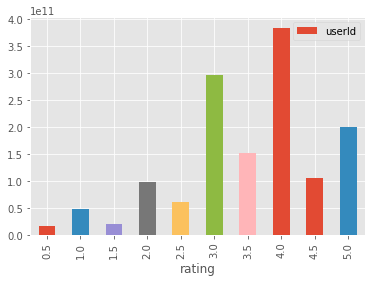

In [32]:
df2.plot(y='userId', kind='bar')

In [34]:
df3 = df['rating'].compute()

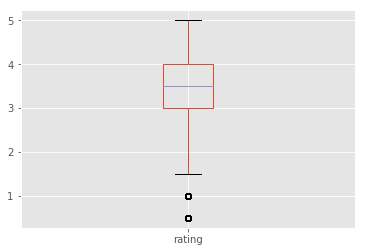

In [37]:
df3.plot.box();

In [3]:
# Lendo a dataset movies_ratings_media
df = pd.read_csv('./movies_ratings_media.csv', sep=',')

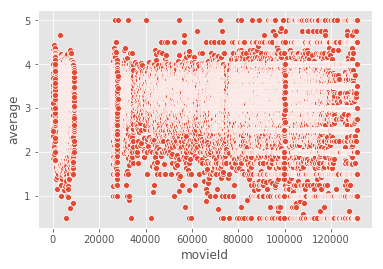

In [7]:
sns.scatterplot(y='average', x='movieId', data=df);

In [11]:
# lendo o dataset userid_cont
df = pd.read_csv('./userid_cont.csv', sep=';')

In [12]:
df.head()

,userId,qtmovie
0,1,175
1,10,38
2,100,52
3,1000,57
4,10000,73


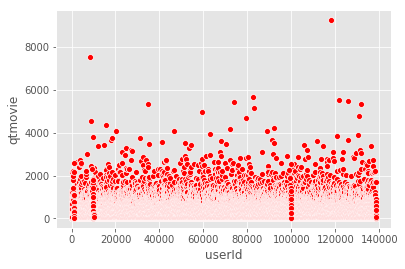

In [19]:
sns.scatterplot(x='userId', y='qtmovie', data=df, color='red');